In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error #Using MAE incase of outliers
import matplotlib.pyplot as plt


from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('miami-housing.csv')

 **Data from: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset**

The dataset contains the following columns:

    PARCELNO: unique identifier for each property. About 1% appear multiple times.
    SALE_PRC: sale price ($)
    LND_SQFOOT: land area (square feet)
    TOT_LVG_AREA: floor area (square feet)
    SPEC_FEAT_VAL: value of special features (e.g., swimming pools) ($)
    RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)
    OCEAN_DIST: distance to the ocean (feet)
    WATER_DIST: distance to the nearest body of water (feet)
    CNTR_DIST: distance to the Miami central business district (feet)
    SUBCNTR_DI: distance to the nearest subcenter (feet)
    HWY_DIST: distance to the nearest highway (an indicator of noise) (feet)
    age: age of the structure
    avno60plus: dummy variable for airplane noise exceeding an acceptable level
    structure_quality: quality of the structure
    month_sold: sale month in 2016 (1 = jan)
    LATITUDE
    LONGITUDE


In [3]:
df.drop(['PARCELNO', 'LONGITUDE', 'LATITUDE'], axis=1, inplace=True)

In [4]:
df.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SALE_PRC           13932 non-null  float64
 1   LND_SQFOOT         13932 non-null  int64  
 2   TOT_LVG_AREA       13932 non-null  int64  
 3   SPEC_FEAT_VAL      13932 non-null  int64  
 4   RAIL_DIST          13932 non-null  float64
 5   OCEAN_DIST         13932 non-null  float64
 6   WATER_DIST         13932 non-null  float64
 7   CNTR_DIST          13932 non-null  float64
 8   SUBCNTR_DI         13932 non-null  float64
 9   HWY_DIST           13932 non-null  float64
 10  age                13932 non-null  int64  
 11  avno60plus         13932 non-null  int64  
 12  month_sold         13932 non-null  int64  
 13  structure_quality  13932 non-null  int64  
dtypes: float64(7), int64(7)
memory usage: 1.5 MB


In [6]:
# Splittin the data into features and target variables
X = df.drop('SALE_PRC', axis=1)
y = df['SALE_PRC']

In [7]:
X.head()
y

,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


0        440000.0
1        349000.0
2        800000.0
3        988000.0
4        755000.0
           ...   
13927    275000.0
13928    340000.0
13929    287500.0
13930    315000.0
13931    250000.0
Name: SALE_PRC, Length: 13932, dtype: float64

In [8]:
X.shape

(13932, 13)

In [9]:
y.shape

(13932,)

In [10]:
# Get all column names
all_columns = df.columns.tolist()

# List of all column names except SALE_PRC
feature_names = [col for col in all_columns if col != 'SALE_PRC']

# List containing only SALE_PRC
target_name = ['SALE_PRC']

In [11]:
X.head()

,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)

In [14]:
X_train_std.head()

,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,1.058158,-0.992463,-0.589826,-1.001761,0.036939,-0.914175,-0.605775,0.364569,-0.707474,0.017633,-0.127086,1.619543,-1.381051
1,-0.431377,0.418824,-0.336501,2.656791,-0.705347,0.059940,1.607600,1.420957,-0.515428,-1.400366,-0.127086,0.710391,0.439811
2,-0.348626,-0.746223,-0.683198,-1.019242,-0.396819,-0.949972,-0.805768,-0.979218,-1.171954,1.577432,-0.127086,-1.714013,0.439811
3,0.072085,-0.362774,-0.414431,-0.068542,-0.413245,-0.959721,-0.838987,0.027437,-0.599499,0.206699,-0.127086,-1.107912,-1.381051
4,-0.543093,0.522955,0.105434,-0.496622,-0.790640,-0.554578,1.011295,0.527989,-0.446836,-1.447633,-0.127086,1.316492,0.439811


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=RandomForestRegressor(), min_features_to_select=3, step=1, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
rfecv.fit(X_train_std, y_train)




RFECV(cv=5, estimator=RandomForestRegressor(), min_features_to_select=3,
      n_jobs=-1, scoring='neg_mean_absolute_error', verbose=1)

In [16]:
selected_features = X_train_std.columns[rfecv.support_]
print(selected_features)

Index(['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age', 'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')


In [17]:
X_train_std_selected = pd.DataFrame(X_train_std[selected_features], columns=['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age', 'structure_quality'])

In [18]:
X_train_std_selected.head()


,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,structure_quality
0,1.058158,-0.992463,-0.589826,-1.001761,0.036939,-0.914175,-0.605775,0.364569,-0.707474,0.017633,-1.381051
1,-0.431377,0.418824,-0.336501,2.656791,-0.705347,0.059940,1.607600,1.420957,-0.515428,-1.400366,0.439811
2,-0.348626,-0.746223,-0.683198,-1.019242,-0.396819,-0.949972,-0.805768,-0.979218,-1.171954,1.577432,0.439811
3,0.072085,-0.362774,-0.414431,-0.068542,-0.413245,-0.959721,-0.838987,0.027437,-0.599499,0.206699,-1.381051
4,-0.543093,0.522955,0.105434,-0.496622,-0.790640,-0.554578,1.011295,0.527989,-0.446836,-1.447633,0.439811


In [29]:
# Implementing XGboost
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_std_selected, y_train)

gbr_predictions = gbr.predict(X_train_std_selected)

score = gbr.score(X_train_std_selected, y_train)
print("Model Score:", score)

GradientBoostingRegressor(random_state=42)

Model Score: 0.9246441851188739


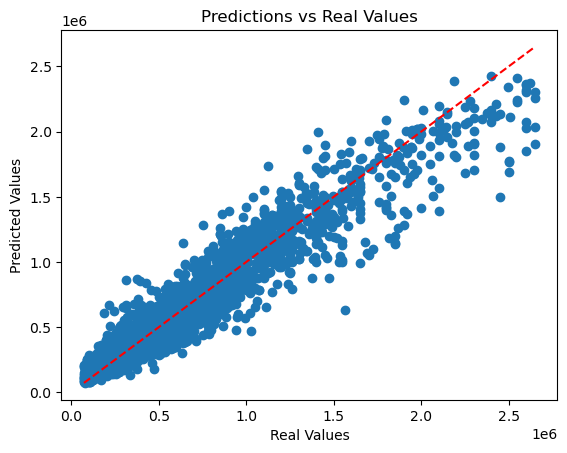

In [31]:
import matplotlib.pyplot as plt

plt.scatter(y_train, gbr_predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Real Values')
plt.show();


In [32]:
import plotly.graph_objects as go

# Assuming y_train and gbr_predictions are defined
# Create scatter plot for predictions vs real values
scatter = go.Scatter(x=y_train, y=gbr_predictions, mode='markers', name='Predicted vs Real')

# Create line plot for the identity line
line = go.Scatter(x=[min(y_train), max(y_train)], y=[min(y_train), max(y_train)], mode='lines', name='Identity Line', line=dict(color='red', dash='dash'))

# Define layout
layout = go.Layout(title='Predictions vs Real Values',
                   xaxis=dict(title='Real Values'),
                   yaxis=dict(title='Predicted Values'),
                   showlegend=True)

# Create figure and add traces
fig = go.Figure(data=[scatter, line], layout=layout)

# Show plot
fig.show()

In [24]:
gbr.feature_names_in_


array(['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age', 'structure_quality'], dtype=object)